In [271]:
from torchvision import datasets, transforms
import torch.nn as nn
import torch

In [272]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize channels to [-1,1]
])


In [273]:
train_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root="data", train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [274]:
from torch.utils.data import DataLoader

train_dl = DataLoader(dataset=train_data, shuffle=True, batch_size=32)
test_dl = DataLoader(dataset=test_data, batch_size=32)
len(train_dl), len(test_dl)


(1563, 313)

In [275]:
for img, label in train_dl:
    print(img.shape)
    print(label.shape)
    break

class_names = train_data.classes

torch.Size([32, 3, 32, 32])
torch.Size([32])


In [ ]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(3*32*32,256)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(256,10)

    def forward(self, x):
        print(x.shape)
        x = self.relu(self.flatten(x))
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.sigmoid(x)
        return x
    
    def train_data()

model = SimpleModel()

In [277]:
# for img, label in train_dl:
#     print(torch.sum(model(img)[0]))
#     break

from torchinfo import summary
summary(model, input_size=(32, 3, 32, 32))

torch.Size([32, 3, 32, 32])


Layer (type:depth-idx)                   Output Shape              Param #
SimpleModel                              [32, 10]                  --
├─Flatten: 1-1                           [32, 3072]                --
├─ReLU: 1-2                              [32, 3072]                --
├─Linear: 1-3                            [32, 256]                 786,688
├─ReLU: 1-4                              [32, 256]                 --
├─Linear: 1-5                            [32, 10]                  2,570
├─ReLU: 1-6                              [32, 10]                  --
├─Sigmoid: 1-7                           [32, 10]                  --
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 25.26
Input size (MB): 0.39
Forward/backward pass size (MB): 0.07
Params size (MB): 3.16
Estimated Total Size (MB): 3.62

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])


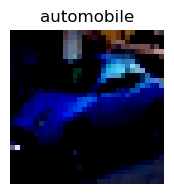

In [278]:
import matplotlib.pyplot as plt

for img, label in train_dl:
    print(img[0].shape)
    plt.figure(figsize=(2,2))
    plt.imshow(img[0].permute(1, 2, 0), interpolation='nearest')
    plt.axis(False)
    plt.title(class_names[label[0]])
    break